In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

x = iris.data
y = iris.target

x = x[y<2, :2]
y = y[y<2]

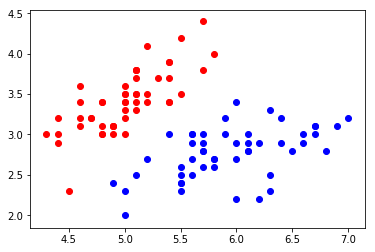

In [3]:
plt.scatter(x[y==0,0],x[y==0,1], color='red')
plt.scatter(x[y==1,0],x[y==1,1], color='blue')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(x)
x_standard = standardScaler.transform(x)


In [5]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)
svc.fit(x_standard, y)


LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [15]:
#绘制决策边界
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100))
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_camp = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_camp)

D:\anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


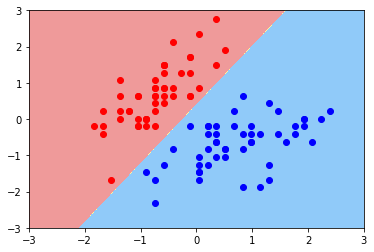

In [8]:
plot_decision_boundary(svc, axis=[-3,3,-3,3])
plt.scatter(x_standard[y==0,0],x_standard[y==0,1], color='red')
plt.scatter(x_standard[y==1,0],x_standard[y==1,1], color='blue')
plt.show()

In [9]:
svc2 = LinearSVC(C=0.01)
svc2.fit(x_standard, y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

D:\anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


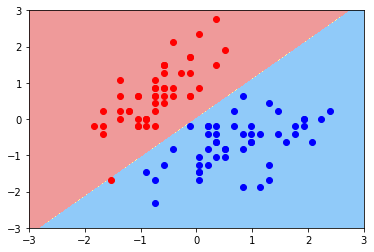

In [10]:
plot_decision_boundary(svc2, axis=[-3,3,-3,3])
plt.scatter(x_standard[y==0,0],x_standard[y==0,1], color='red')
plt.scatter(x_standard[y==1,0],x_standard[y==1,1], color='blue')
plt.show()

In [11]:
svc.coef_

array([[ 4.03235136, -2.49296494]])

In [14]:
svc.intercept_

array([0.95365818])

In [12]:
def plot_svc_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100))
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_camp = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_camp)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w0 * x0 + w1 * x1 + b = 0
    # x1 = -w0/w1 * x0 - b/w1
    
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] *plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] *plot_x - b/w[1] - 1/w[1]
    
    up_index =(up_y >= axis[2]) & (up_y <= axis[3])
    down_index =(down_y >= axis[2]) & (down_y <= axis[3])
    
    plt.plot(plot_x[up_index], up_y[up_index], color="black")
    plt.plot(plot_x[down_index], down_y[down_index], color="black")

D:\anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


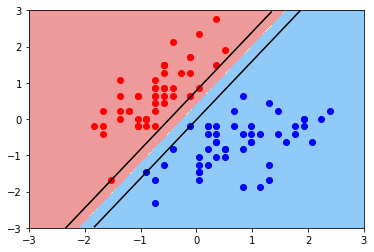

In [18]:
plot_svc_decision_boundary(svc, axis=[-3,3,-3,3])
plt.scatter(x_standard[y==0,0],x_standard[y==0,1], color='red')
plt.scatter(x_standard[y==1,0],x_standard[y==1,1], color='blue')
plt.show()

D:\anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


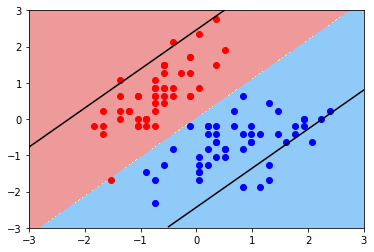

In [19]:
plot_svc_decision_boundary(svc2, axis=[-3,3,-3,3])
plt.scatter(x_standard[y==0,0],x_standard[y==0,1], color='red')
plt.scatter(x_standard[y==1,0],x_standard[y==1,1], color='blue')
plt.show()

# 多项式特征

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn import datasets

x, y = datasets.make_moons()



(100, 2)

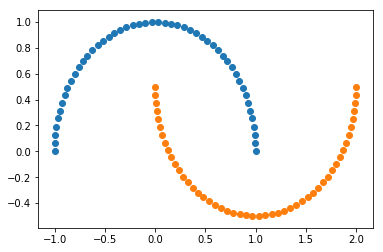

In [5]:
plt.scatter(x[y==0, 0],x[y==0, 1])
plt.scatter(x[y==1, 0],x[y==1, 1])
plt.show()

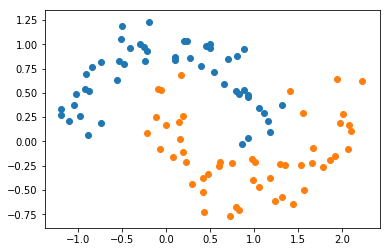

In [7]:
x, y = datasets.make_moons(noise=0.15, random_state=666)
plt.scatter(x[y==0, 0],x[y==0, 1])
plt.scatter(x[y==1, 0],x[y==1, 1])
plt.show()

In [8]:
from sklearn .preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [9]:
def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ("poly" ,PolynomialFeatures(degree = degree)),
        ("std_scaler",StandardScaler()),
        ("linearSVC", LinearSVC(C=C))
        
    ])

In [10]:
poly_svc = PolynomialSVC(degree=3)

In [13]:
poly_svc.fit(x, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

D:\anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


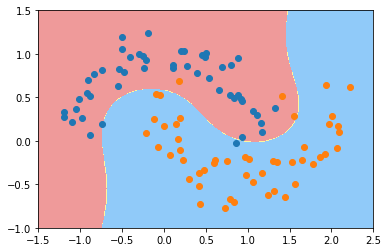

In [16]:
plot_decision_boundary(poly_svc,axis=[-1.5,2.5,-1.0,1.5] )
plt.scatter(x[y==0, 0],x[y==0, 1])
plt.scatter(x[y==1, 0],x[y==1, 1])
plt.show()

# 使用多项式核函数的SVM

In [17]:
from sklearn.svm import SVC


In [18]:
def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("kernelSVC", SVC(kernel="poly",degree=degree,C=C))
        
    ])

In [23]:
poly_kernel_svc= PolynomialKernelSVC(degree=3, C=0.1)
poly_kernel_svc.fit(x,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kernelSVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

D:\anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


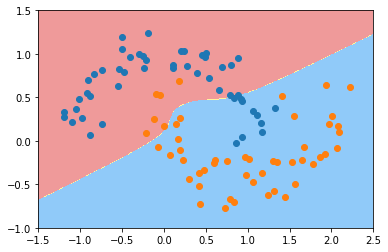

In [24]:
plot_decision_boundary(poly_kernel_svc,axis=[-1.5,2.5,-1.0,1.5] )
plt.scatter(x[y==0, 0],x[y==0, 1])
plt.scatter(x[y==1, 0],x[y==1, 1])
plt.show()

In [25]:
x = np.arange(-4,5)

In [26]:
x

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [28]:
y = np.array((x>=-2)&(x<=2),dtype='int')
y

array([0, 0, 1, 1, 1, 1, 1, 0, 0])

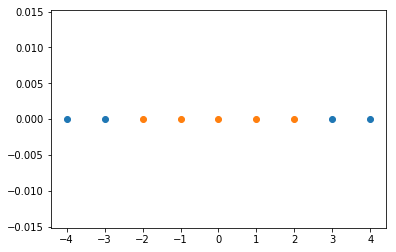

In [32]:
plt.scatter(x[y==0],[0]*len(x[y==0]))
plt.scatter(x[y==1],[0]*len(x[y==1]))
plt.show()

In [33]:
def gaussiam(x, l):
    gamma = 1.0
    return np.exp(-gamma * (x-l)**2)

In [35]:
l1, l2 = -1, 1

x_new = np.empty((len(x), 2))
for i ,data in enumerate(x):
    x_new[i,0] = gaussiam(data, l1)
    x_new[i,1] = gaussiam(data, l2)

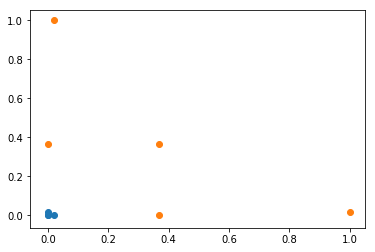

In [37]:
plt.scatter(x_new[y==0, 0],x_new[y==0, 1])
plt.scatter(x_new[y==1, 0],x_new[y==1, 1])
plt.show()

# scikit-learn中的RBF核

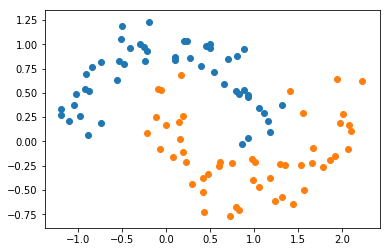

In [39]:
x, y = datasets.make_moons(noise=0.15, random_state=666)
plt.scatter(x[y==0, 0],x[y==0, 1])
plt.scatter(x[y==1, 0],x[y==1, 1])
plt.show()

In [42]:
def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svc", SVC(kernel="rbf", gamma=gamma))
    ])

In [43]:
svc = RBFKernelSVC(gamma=1.0)
svc.fit(x, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

D:\anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


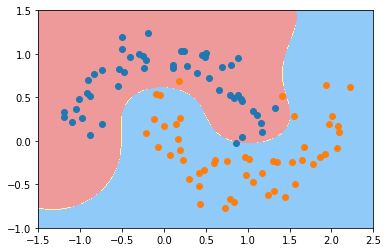

In [45]:
plot_decision_boundary(svc,axis=[-1.5,2.5,-1.0,1.5] )
plt.scatter(x[y==0, 0],x[y==0, 1])
plt.scatter(x[y==1, 0],x[y==1, 1])
plt.show()

In [46]:
svc_gamma100 = RBFKernelSVC(gamma=100)
svc_gamma100.fit(x, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

D:\anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


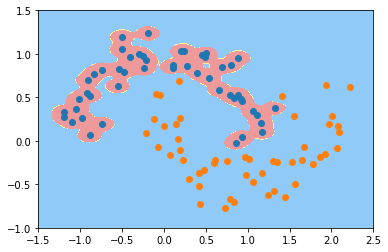

In [47]:
plot_decision_boundary(svc_gamma100,axis=[-1.5,2.5,-1.0,1.5] )
plt.scatter(x[y==0, 0],x[y==0, 1])
plt.scatter(x[y==1, 0],x[y==1, 1])
plt.show()

In [50]:
svc_gamma05 = RBFKernelSVC(gamma=0.1)
svc_gamma05.fit(x, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

D:\anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


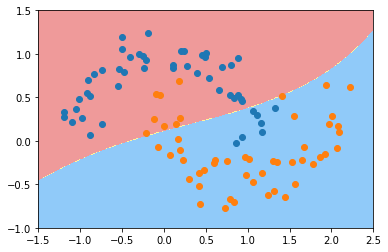

In [51]:
plot_decision_boundary(svc_gamma05,axis=[-1.5,2.5,-1.0,1.5] )
plt.scatter(x[y==0, 0],x[y==0, 1])
plt.scatter(x[y==1, 0],x[y==1, 1])
plt.show()

# SVM思想解决回归问题

In [52]:
boston = datasets.load_boston()
x = boston.data
y = boston.target


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=666)

In [55]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

In [56]:
def StandardLinearSVR(epsilon=0.1):
    return Pipeline([
       ("std_scaler", StandardScaler()),
        ("linearSVR", LinearSVR(epsilon=epsilon))
    ])

In [57]:
svr = StandardLinearSVR()

svr.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVR', LinearSVR(C=1.0, dual=True, epsilon=0.1, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

In [58]:
svr.score(x_test, y_test)

0.636015660081088